In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\shrey\Desktop\DAPP_Aug2023\DATA\chennai_reservoir_levels.csv")
df.head(5)

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [5]:
df.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
5642,13-06-2019,30.0,0.0,0.0,1.0
5643,14-06-2019,28.0,0.0,0.0,1.0
5644,15-06-2019,27.0,0.0,0.0,1.0
5645,16-06-2019,26.0,0.0,0.0,1.0
5646,17-06-2019,25.0,0.0,0.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5647 non-null   object 
 1   POONDI           5647 non-null   float64
 2   CHOLAVARAM       5647 non-null   float64
 3   REDHILLS         5647 non-null   float64
 4   CHEMBARAMBAKKAM  5647 non-null   float64
dtypes: float64(4), object(1)
memory usage: 220.7+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.7 KB


In [10]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Year',
       'Month'],
      dtype='object')

In [11]:
df['Year']=df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Total'] = df[[ 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']].sum(axis=1)
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1,270.9
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1,270.9
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1,270.8


In [17]:
df_yearmean = df[[ 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM','Total','Year']].groupby('Year',as_index=False).mean()
df_yearmean.head()

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004,77.766967,19.060109,220.899180,68.683060,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,7050.076503


Text(0.5, 1.0, 'per_year_total_reservoir_data')

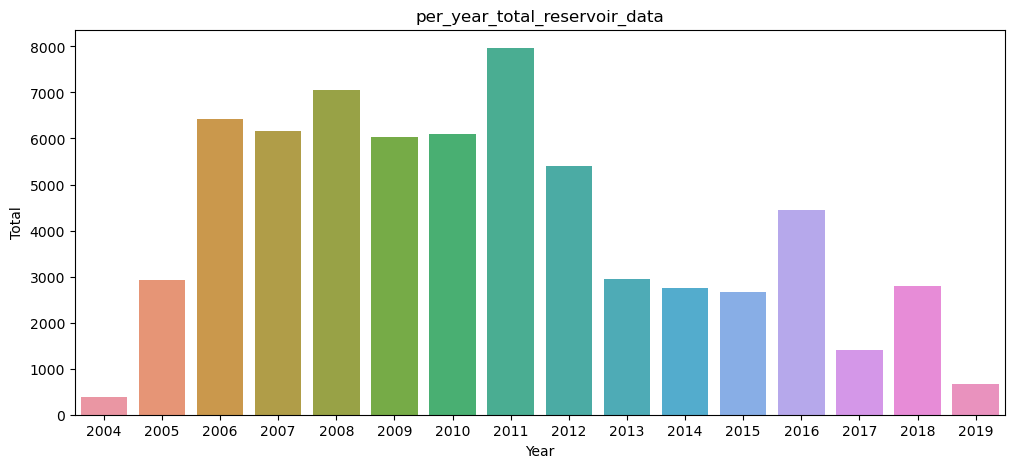

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='Year',y='Total',data=df_yearmean)
plt.title('per_year_total_reservoir_data')

In [21]:
df_yearmean.columns

Index(['Year', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Total'], dtype='object')

<Axes: xlabel='Year'>

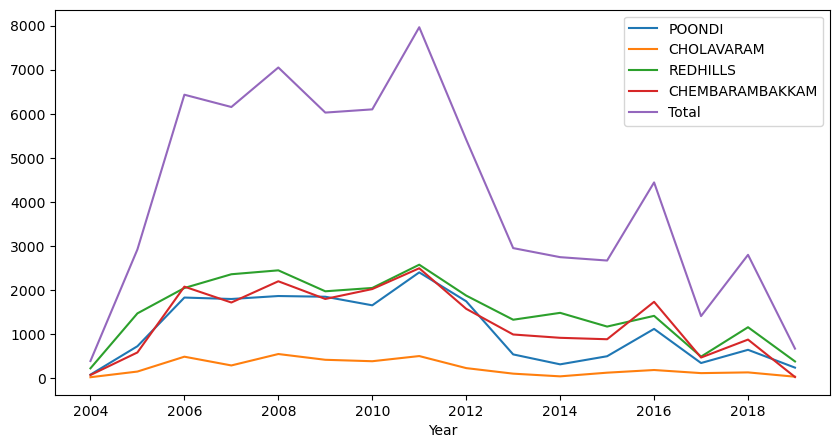

In [24]:
df_yearmean.plot(x='Year', y=['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Total'],kind="line", figsize=(10, 5))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Year             5647 non-null   int64         
 6   Month            5647 non-null   int64         
 7   Total            5647 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 353.1 KB


In [26]:
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Year'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             5647 non-null   datetime64[ns]
 1   POONDI           5647 non-null   float64       
 2   CHOLAVARAM       5647 non-null   float64       
 3   REDHILLS         5647 non-null   float64       
 4   CHEMBARAMBAKKAM  5647 non-null   float64       
 5   Year             5647 non-null   category      
 6   Month            5647 non-null   category      
 7   Total            5647 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 276.9 KB


C:\Users\shrey\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Year', ylabel='Total'>

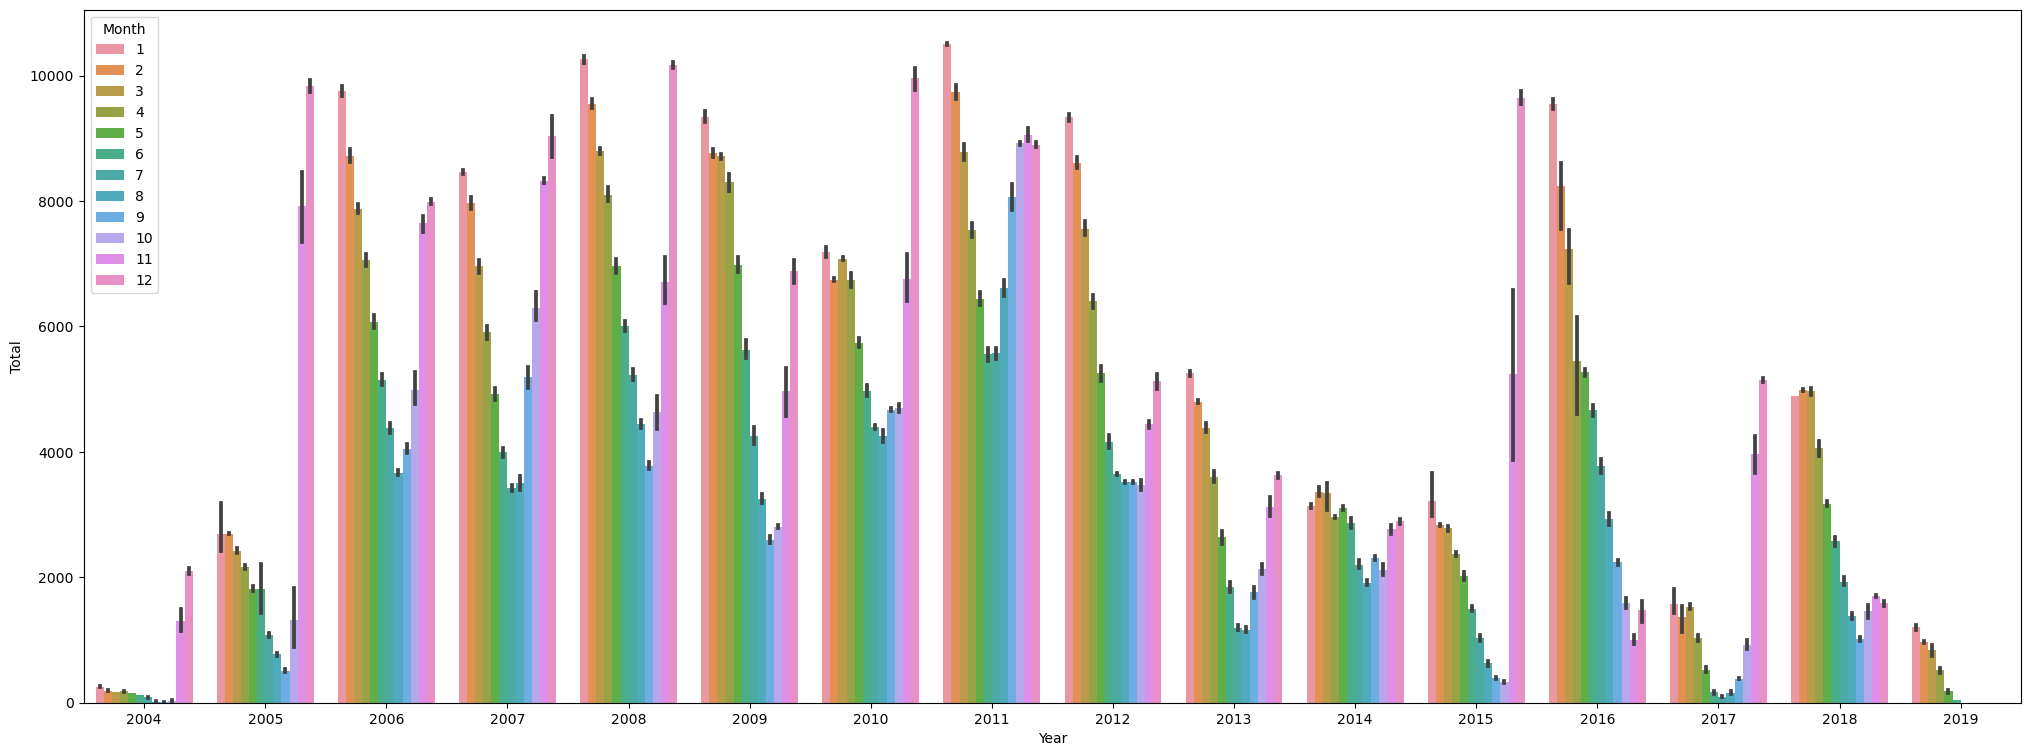

In [28]:
plt.figure(figsize=(25,9))
sns.barplot(x='Year',y='Total',hue='Month',data=df)

In [29]:
df['Month'].value_counts()

Month
1     496
3     496
5     496
4     480
6     467
7     465
8     465
10    465
12    465
2     452
9     450
11    450
Name: count, dtype: int64

C:\Users\shrey\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Year', ylabel='Total'>

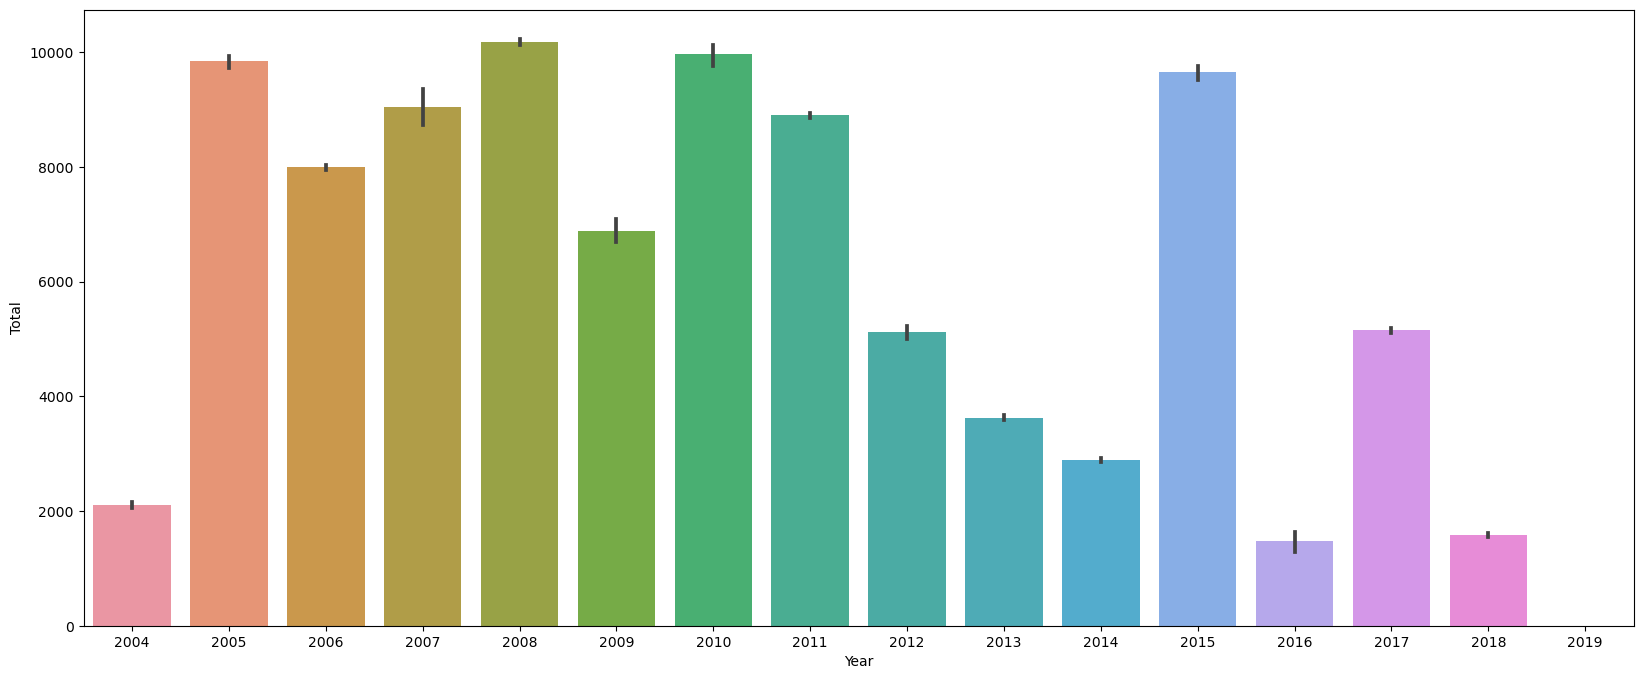

In [31]:
#Plot year-wise variation in total water levels in the month of December 
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Total',data = df[df['Month']==12])


Inferences:

* 